In [ ]:
# Tensorflow 1.0.일 때
# sess.run(변수)함수는 Tensorflow 2.0.일 때는 쓰지 않는다.

In [1]:
import tensorflow.compat.v1 as tf

In [2]:
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
import numpy as np
import pandas as pd

In [4]:
a = tf.add(3, 5)
print(a)

# tf.add( 3, 5)하면 결과값이 8이 안 나오고, a의 빈 값이 나오며 값이 계산되지 않는다.
# 현재 a는 값이 없는 상태이다.
# 변수명을 계산그래프로 그대로 쓰면 겹쳐질 수 있어서 add:0이 만들어 진 것이다.
# name =""로도 add:0을 변경할 수 있다.
# shpae(): 어떤 행렬을 말할 수 있는 지를 말한다.
# dtype: 어떤 타입인지를 나타낸다.

Tensor("Add:0", shape=(), dtype=int32)


In [6]:
sess = tf.Session()
with tf.Session() as sess:
    print(sess.run(a))

# sees.run함수를 써서 a변수에 있는 값을 계산할 수 있다.
# Session 일꾼을 뜻하며, run한 다음에 바로바로 close해야 한다.
# with tf.Session as sess:를 하면 sess.close()할 필요가 없다.

8


In [9]:
# tf.add: 더하다. (2, 3) : 2 + 3을 뜻한다.
# tf.run하기 전까지는 빈 값이며, op1에 있는 값이 계산되지 않는다.
# tf.run했을 경우 결과값은 5가 나온다.

# tf.multiply: 제곱하다. (2, 3) : 2 * 3을 뜻한다.
# tf.run하기 전까지는 빈 값이며, op2에 있는 값이 계산되지 않는다.
# tf.run했을 경우 결과값은 6이 나온다.

# tf.pow: 제곱하다 (6, 5) : 6의 5승을 뜻한다.
# tf.run하기 전까지는 빈 값이며, op3에 있는 값이 계산되지 않는다.
# tf.run했을 경우 결과값은 7776이 나온다.

In [10]:
x = 2
y = 3

op1 = tf.add(x, y)
op2 = tf.multiply(x, y)
op3 = tf.pow(op2, op1)

In [28]:
# tf.add(x, y), tf.multiply(x, y), tf.pow(op2, op1)
# tf.run()함수를 적용하기 전까지는 그 변수에 들어있는 값은 빈 값이며, 그 값은 계산되지 않는다.

In [27]:
print(op1)
print(op2)
print(op3)

Tensor("Add_2:0", shape=(), dtype=int32)
Tensor("Mul_1:0", shape=(), dtype=int32)
Tensor("Pow_1:0", shape=(), dtype=int32)


In [34]:
# tf.run(op3)했을 경우에 op2, op1이 연결되어 있어서 op2, op1도 같이 실행된다.
# 따라서 op3만 실행해도 연결되어 있는 op2, op1가 실행되므로 마지막 변수인 op3만 실행해도 된다.

In [13]:
with tf.Session() as sess:
    print(sess.run(op3))

7776


In [35]:
# 연결된 변수만 실행된다.
# 연산에 관련이 있는 변수만 연결시켜서 실행시켜야 한다.
# 연산에 관련이 없는 변수는 연결시키지 말아야 한다.

In [31]:
x = 2
y = 3

op1 = tf.add(x, y)
op2 = tf.multiply(x, y)
useless = tf.multiply(x, op1)
op3 = tf.pow(op2, op1)

In [37]:
# 연산에 관련이 있는 변수만 연결이 되어서 실행된다.
# 연산에 관련이 없는 변수는 연결이 되어 있지 않아서 실행되지 않는다.
# 여러 tensorflow을 실행하려면 리스트 형식으로 돌리면 된다.

In [33]:
with tf.Session() as sess:
    op3, useless = sess.run([op3, useless])
    print(op3, useless)

7776 10


In [23]:
# Method 1

In [16]:
import tensorflow.compat.v1 as tf

In [17]:
tf.disable_v2_behavior()

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [19]:
x_data = datasets.load_boston().data[:, 12]  # 주변 이웃 중 하위 계층의 비율
y_data = datasets.load_boston().target  # 집의 가격 (in $1,000s)
df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [22]:
# Method 2

# scikit-learn 1.2 부터 삭제된 boston_data 불러오기
#`load_boston` has been removed from scikit-learn since version 1.2.

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1:   :2, 2]
# x_data = datasets.load_boston().data[:, 12] # 주변 이웃 중 하위 계층의 비율
x_data = data[:,12]
y_data = target # 집의 가격 (in $1,000s)
df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [ ]:
# tf.train.GradientDescentOptimizer (0.001은 learning rate를 의미한다. 예를 들면 심부름꾼을 연상하면 된다.
# learning rate: 얼마나 큰 보폭으로 움직이는지 결정해 주는 값

In [20]:
w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

y_predicted = w * x_data + b

In [21]:
loss = tf.reduce_mean(tf.square(y_predicted - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

In [38]:
# tf.Session(): Session 여는 것을 의미
# tf.global_variables_initializer()는 w값과 b값을 초기화하는 것을 의미
# for step in range(10000) : 10,000은 epock를 의미
# epock: 전체 데이터가 몇 번 있는 것을 의미
# sess.run(train)
# print('step {}: w {} b {}'.format(step, sess.run(w), sess.run(b))) : 결과(evaluaion) - 현재 epock, w, b가 출력된다.

In [24]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())  # tf.Variables 초기화
    
    for step in range(10000):
        sess.run(train) # 실제로 Gradient Descent가 실행되는 코드
        if step % 1000 == 0:
            print('step {}: w {} b {}'.format(step, sess.run(w), sess.run(b)))
            print('loss {}'.format(sess.run(loss)))
            print()
    w_out, b_out = sess.run([w, b])

step 0: w [0.7393618] b [-0.55274695]
loss 372.2628173828125

step 1000: w [0.35218218] b [12.863438]
loss 151.9666290283203

step 2000: w [-0.14489883] b [21.142984]
loss 81.8651351928711

step 3000: w [-0.45223734] b [26.26212]
loss 55.0669059753418

step 4000: w [-0.6422605] b [29.427208]
loss 44.82257843017578

step 5000: w [-0.7597485] b [31.384127]
loss 40.90644454956055

step 6000: w [-0.8323896] b [32.59406]
loss 39.409400939941406

step 7000: w [-0.87730235] b [33.342144]
loss 38.83711624145508

step 8000: w [-0.9050703] b [33.804653]
loss 38.61835479736328

step 9000: w [-0.92223936] b [34.090626]
loss 38.534725189208984



In [25]:
# plt.figure(figsize=(10, 10)) : 도화지를 그리는 것을 연상하면 된다.
# rabel : 범례
# ro : 파란 원

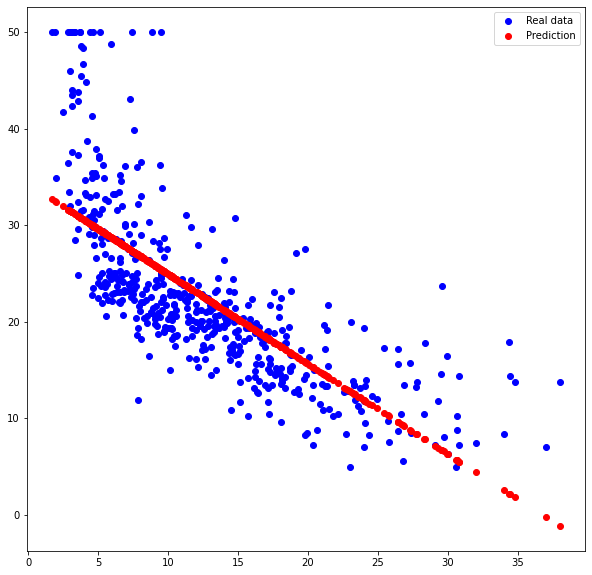

In [26]:
plt.figure(figsize=(10, 10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, x_data * w_out + b_out, 'ro', label='Prediction')
plt.legend()
plt.show()